In [1]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [2]:
%run -i ../../bench.py

In [3]:
data_sm_50_path = os.path.join('data_sm_50.json')
data_sm_100_path = os.path.join('data_sm_100.json')
data_sm_300_path = os.path.join('data_sm_300.json')
data_sm_600_path = os.path.join('data_sm_600.json')
data_sm_1000_path = os.path.join('data_sm_1000.json')
data_med_50_path = os.path.join('data_med_50.json')
data_med_100_path = os.path.join('data_med_100.json')
data_med_300_path = os.path.join('data_med_300.json')
data_med_600_path = os.path.join('data_med_600.json')
data_med_1000_path = os.path.join('data_med_1000.json')
data_lar_50_path = os.path.join('data_lar_50.json')
data_lar_100_path = os.path.join('data_lar_100.json')
data_lar_300_path = os.path.join('data_lar_300.json')
data_lar_600_path = os.path.join('data_lar_600.json')
data_lar_1000_path = os.path.join('data_lar_1000.json')

In [4]:
def gen_param_func(data_tensor_array):
    # for 1 value, just have 1 element in tensor array
    data_tensor = data_tensor_array[0]
    return [torch.exp(torch.mean(torch.log(data_tensor)))]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)

        def forward(self,X):
            # here is witness approach
            return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
    return verifier_model

Summary of Proving Time (1% accuracy)

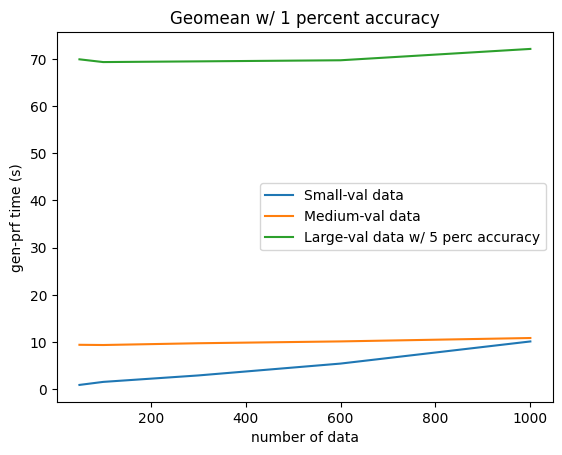

In [10]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
sm_time = [0.9028279781341553, 1.5441746711730957, 2.9084150791168213, 5.424371004104614, 10.114448070526123]

plt.title("Geomean w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

med_time = [9.403581857681274, 9.359130144119263, 9.733612060546875, 10.122606039047241, 10.841309309005737]
plt.plot(data_number, med_time, label = 'Medium-val data')
# circuit of 600 and 1000 data are too big, so we put same number as in case of 100
lar_time = [69.89282393455505, 69.30994296073914, 69.45930123329163, 69.69191193580627, 72.0965039730072]
plt.plot(data_number, lar_time, label = 'Large-val data w/ 5 perc accuracy')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [6]:
bench_one([data_sm_50_path], model_func,gen_param_func, "50 small values","default", "resources")

=====================================  50 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2
spawning module 0


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-498,1020],"logrows":12,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":160,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":512.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 2
spawning module 0
spawning module 2


gen prf time:  0.9028279781341553
Theory result:  tensor(0.4045, dtype=torch.float64)
Our result:  [0.404296875]


In [7]:
bench_one([data_sm_100_path], model_func,gen_param_func, "100 small values","default", "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  100 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-866,1024],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":310,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":512.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.5441746711730957
Theory result:  tensor(0.3957, dtype=torch.float64)
Our result:  [0.396484375]


In [8]:
bench_one([data_sm_300_path], model_func,gen_param_func, "300 small values","default", "resources")

=====================================  300 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-2888,1022],"logrows":14,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":910,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":512.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  2.9084150791168213
Theory result:  tensor(0.3716, dtype=torch.float64)
Our result:  [0.37109375]


In [9]:
bench_one([data_sm_600_path], model_func,gen_param_func, "600 small values","default", "resources")

=====================================  600 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-4958,1010],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1810,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":512.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.424371004104614
Theory result:  tensor(0.3498, dtype=torch.float64)
Our result:  [0.349609375]


In [10]:
bench_one([data_sm_1000_path], model_func,gen_param_func, "1000 small values","default", "resources")

=====================================  1000 small values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-9902,1024],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":3010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":512.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.114448070526123
Theory result:  tensor(0.3611, dtype=torch.float64)
Our result:  [0.361328125]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [11]:
bench_one([data_med_50_path], model_func,gen_param_func, "50 medium values","default", "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":8,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-500,51148],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":161,"total_const_size":5,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[8],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":256.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.403581857681274
Theory result:  tensor(29.6977, dtype=torch.float64)
Our result:  [29.697265625]


In [12]:
bench_one([data_med_100_path], model_func,gen_param_func, "100 medium values","default", "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  100 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":8,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-1012,50432],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":311,"total_const_size":5,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[8],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":256.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.359130144119263
Theory result:  tensor(34.9273, dtype=torch.float64)
Our result:  [34.927734375]


In [13]:
bench_one([data_med_300_path], model_func,gen_param_func, "300 medium values","default", "resources")

=====================================  300 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":8,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-3036,50228],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":911,"total_const_size":5,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[8],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":256.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.733612060546875
Theory result:  tensor(39.5938, dtype=torch.float64)
Our result:  [39.59375]


In [14]:
bench_one([data_med_600_path], model_func,gen_param_func, "600 medium values","default", "resources")

=====================================  600 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":8,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-6088,51200],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1811,"total_const_size":5,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[8],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":256.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.122606039047241
Theory result:  tensor(37.7348, dtype=torch.float64)
Our result:  [37.734375]


In [15]:
bench_one([data_med_1000_path], model_func,gen_param_func, "1000 medium values","default", "resources")

=====================================  1000 medium values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85671/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":8,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-10190,51200],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":3011,"total_const_size":5,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[8],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":256.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.841309309005737
Theory result:  tensor(38.4133, dtype=torch.float64)
Our result:  [38.4140625]


=============================================================================================================

Large-valued data: value 100-10000, 0 decimal on 50, 100, 300, 600, 1000 data

In [5]:
bench_one([data_lar_50_path], model_func,gen_param_func, "50 large values",[4], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85836/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  50 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[-14,319168],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":160,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  69.89282393455505
Theory result:  tensor(4406.3075, dtype=torch.float64)
Our result:  [4406.3125]


In [6]:
bench_one([data_lar_100_path], model_func,gen_param_func, "100 large values",[4], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85836/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  100 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[-30,317984],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":310,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  69.30994296073914
Theory result:  tensor(3389.6629, dtype=torch.float64)
Our result:  [3389.6875]


In [7]:
bench_one([data_lar_300_path], model_func,gen_param_func, "300 large values",[4], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85836/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  300 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[-94,319552],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":910,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  69.45930123329163
Theory result:  tensor(3868.2301, dtype=torch.float64)
Our result:  [3868.25]


In [8]:
bench_one([data_lar_600_path], model_func,gen_param_func, "600 large values",[4], "resources")

=====================================  600 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[-188,319776],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1810,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85836/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  69.69191193580627
Theory result:  tensor(3676.3356, dtype=torch.float64)
Our result:  [3676.3125]


In [9]:
bench_one([data_lar_1000_path], model_func,gen_param_func, "1000 large values",[4], "resources")

=====================================  1000 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[-312,319776],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":3010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_85836/93917070.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=X.size()[1]*torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  72.0965039730072
Theory result:  tensor(3976.7341, dtype=torch.float64)
Our result:  [3976.75]
